# Roubo de Veículos - Janeiro de 2022

In [39]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [40]:
df = pd.read_csv('DadosBO_2022_1(ROUBO DE VEÍCULOS).csv', encoding='utf-16')

In [41]:
df.head()

,ANO_BO,NUM_BO,NUMERO_BOLETIM,BO_INICIADO,BO_EMITIDO,DATAOCORRENCIA,HORAOCORRENCIA,PERIDOOCORRENCIA,DATACOMUNICACAO,DATAELABORACAO,...,CIDADE_VEICULO,DESCR_COR_VEICULO,DESCR_MARCA_VEICULO,ANO_FABRICACAO,ANO_MODELO,DESCR_TIPO_VEICULO,QUANT_CELULAR,MARCA_CELULAR,Unnamed: 54,Unnamed: 55
0,2022,1,1/2022,01/01/2022 00:04:11,01/01/2022 00:30:42,31/12/2021,22:30,A NOITE,01/01/2022,01/01/2022 00:04:11,...,LKN4215,SP,S.PAULO,Preta,I/PEUGEOT 307 16 PR PK,2007,2008,AUTOMOVEL,NaN,NaN
1,2021,2528472,2528472/2021,01/01/2022 00:34:31,01/01/2022 00:34:13,31/12/2021,22:20,A NOITE,31/12/2021,01/01/2022 00:34:31,...,BWB4710,SP,SÃO PAULO,Branco,FORD/KA SE 1.0 HA C,2019,NaN,AUTOMOVEL,NaN,NaN
2,2022,1,1/2022,01/01/2022 00:32:20,01/01/2022 00:41:16,31/12/2021,23:34,A NOITE,01/01/2022,01/01/2022 00:32:20,...,FOQ8F35,SP,BARUERI,Preta,JEEP/COMPASS LIMITED F,2016,2017,CAMIONETA,NaN,NaN
3,2022,2,2/2022,01/01/2022 00:41:46,01/01/2022 00:41:29,31/12/2021,21:50,A NOITE,01/01/2022,01/01/2022 00:41:46,...,DZI7987,SP,FERRAZ DE VASCONCELO,Prata,I/HYUNDAI TUCSON GL 20L,2007,NaN,AUTOMOVEL,NaN,NaN
4,2022,11,11/2022,01/01/2022 00:45:00,01/01/2022 00:45:26,31/12/2021,22:30,A NOITE,01/01/2022,01/01/2022 00:45:00,...,SANTO ANDRÉ,Prata,HONDA/FIT LX CVT,2017,NaN,AUTOMOVEL,NaN,NaN,NaN,NaN


In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6862 entries, 0 to 6861
Data columns (total 56 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   ANO_BO                    6862 non-null   int64 
 1   NUM_BO                    6862 non-null   int64 
 2   NUMERO_BOLETIM            6862 non-null   object
 3   BO_INICIADO               6862 non-null   object
 4   BO_EMITIDO                6862 non-null   object
 5   DATAOCORRENCIA            6862 non-null   object
 6   HORAOCORRENCIA            6534 non-null   object
 7   PERIDOOCORRENCIA          6862 non-null   object
 8   DATACOMUNICACAO           6862 non-null   object
 9   DATAELABORACAO            6862 non-null   object
 10  BO_AUTORIA                6862 non-null   object
 11  FLAGRANTE                 6862 non-null   object
 12  NUMERO_BOLETIM_PRINCIPAL  1054 non-null   object
 13  LOGRADOURO                6358 non-null   object
 14  NUMERO                  

## Pré-processamento

In [43]:
# just Sao Paulo data
df_sao_paulo = df[df['CIDADE'] == 'S.PAULO']

In [44]:
# convert adress columns to lower case and remove extra whitespaces
columns = ['LOGRADOURO', 'BAIRRO', 'CIDADE', 'UF', 'PERIDOOCORRENCIA']
for column in columns:
    df_sao_paulo[column] = df_sao_paulo[column].str.lower().str.strip()

# convert time columns to datetime data type
df_sao_paulo[['BO_INICIADO', 'BO_EMITIDO', 'DATAOCORRENCIA', 'DATACOMUNICACAO', 'DATAELABORACAO']] = df_sao_paulo[['BO_INICIADO', 'BO_EMITIDO', 'DATAOCORRENCIA', 'DATACOMUNICACAO', 'DATAELABORACAO']].apply(pd.to_datetime)

C:\Users\pedro\AppData\Local\Temp\ipykernel_1612\1928136047.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sao_paulo[column] = df_sao_paulo[column].str.lower().str.strip()
c:\Users\pedro\AppData\Local\Programs\Python\Python310\lib\site-packages\pandas\core\frame.py:3641: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


In [45]:
# extract the month of each occurrence
df_sao_paulo['MES_OCORRENCIA'] = pd.DatetimeIndex(df_sao_paulo['DATAOCORRENCIA']).month

C:\Users\pedro\AppData\Local\Temp\ipykernel_1612\162071468.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_sao_paulo['MES_OCORRENCIA'] = pd.DatetimeIndex(df_sao_paulo['DATAOCORRENCIA']).month


## Análise exploratória

### Evolução de roubos ao longo do tempo

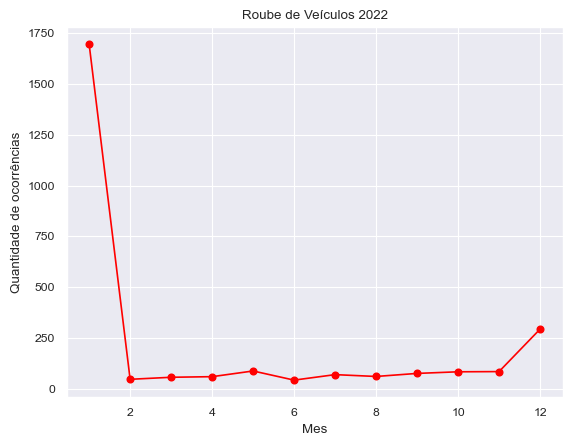

In [57]:
fig, ax = plt.subplots()

ax.plot(df_sao_paulo['MES_OCORRENCIA'].value_counts().sort_index(), marker='o', color='red')
ax.set_title("Roube de Veículos 2022")
ax.set_xlabel("Mes")
ax.set_ylabel("Quantidade de ocorrências")

plt.show()

<p> Percebe-se que, devido o conjunto de dados ser referente aos crimes REGISTRADOS em janeiro e, geralmente, os crimes serem comunicados no mesmo mês de ocorrência, temos muito mais registros de crimes no primeiro mês. Logo, talvez uma análise dia a dia de Janeiro seja mais interessante. </p>

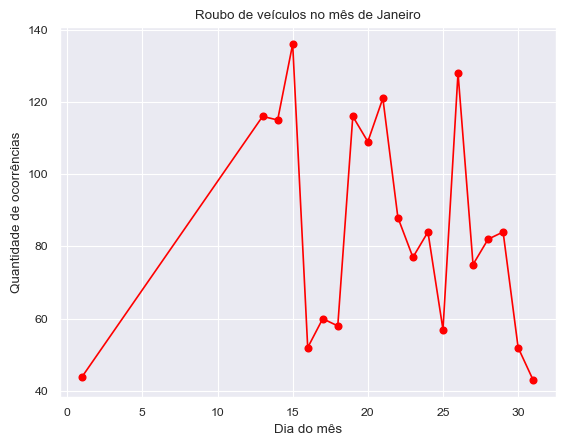

In [55]:
df_sao_paulo_janeiro = df_sao_paulo[df_sao_paulo['MES_OCORRENCIA'] == 1]

fig, ax = plt.subplots()

ax.plot(pd.DatetimeIndex(df_sao_paulo_janeiro['DATAOCORRENCIA']).day.value_counts().sort_index(), marker='o', color='red')
ax.set_title("Roubo de veículos no mês de Janeiro")
ax.set_xlabel("Dia do mês")
ax.set_ylabel("Quantidade de ocorrências")

plt.show()

### Quais os períodos mais perigosos?

In [71]:
# graph style
sns.set_context("paper")
sns.set_style('darkgrid')

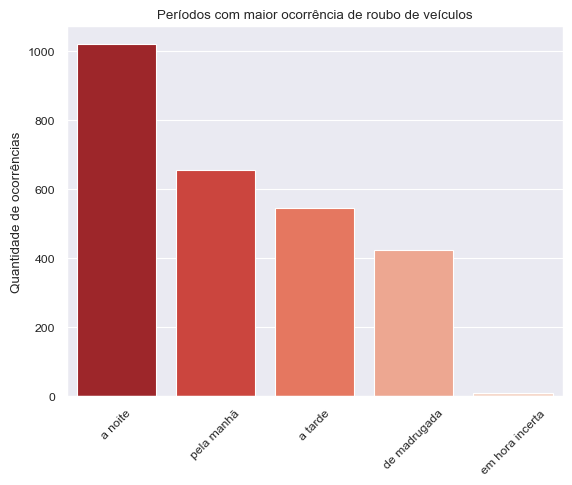

In [73]:
palette = sns.color_palette("Reds", 5)
palette.reverse()
sns.barplot(x=df_sao_paulo['PERIDOOCORRENCIA'].value_counts().index, y=df_sao_paulo['PERIDOOCORRENCIA'].value_counts(), palette=palette)

plt.ylabel("Quantidade de ocorrências")
plt.title("Períodos com maior ocorrência de roubo de veículos")
plt.xticks(rotation=45)

plt.show()

### Locais mais perigosos

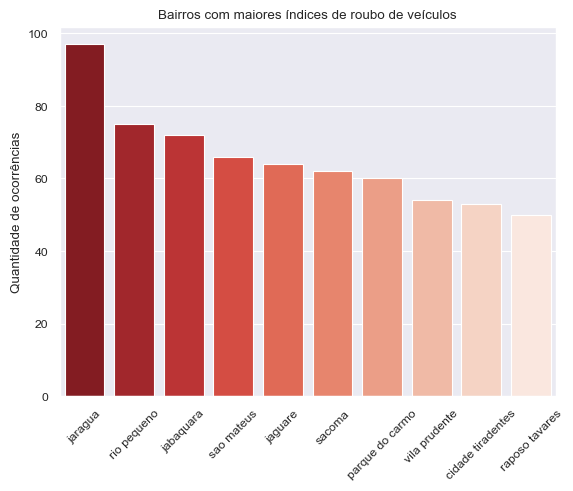

In [74]:
palette = sns.color_palette("Reds", 10)
palette.reverse()
sns.barplot(x=df_sao_paulo['BAIRRO'].value_counts().head(10).index, y=df_sao_paulo['BAIRRO'].value_counts().head(10), palette=palette)

plt.xticks(rotation=45)
plt.ylabel("Quantidade de ocorrências")
plt.title("Bairros com maiores índices de roubo de veículos")

plt.show()

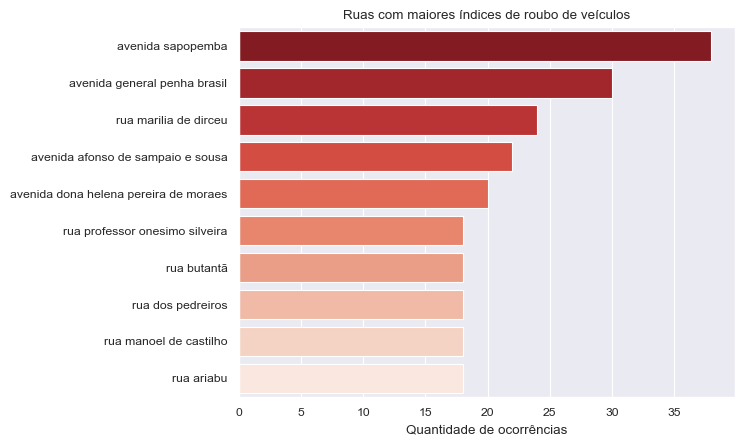

In [75]:
sns.barplot(x=df_sao_paulo['LOGRADOURO'].value_counts().head(10), y=df_sao_paulo['LOGRADOURO'].value_counts().head(10).index, palette=palette)

plt.xlabel("Quantidade de ocorrências")
plt.title("Ruas com maiores índices de roubo de veículos")

plt.show()